In [57]:
# import the dataset

import pandas as pd

df = pd.read_csv("./training_data.csv", encoding='cp1252')

df.head()



,OBS_ID,KANAL,SHOW_ID,SHOW_DATUM,FAKTOR,WORDING_ID,BRAND_FLG,BRAND_ID,WDHL_FLG,BESTELL_ID,...,WGH3_DESC,WGH4_DESC,DIVISION_DESC_SORT,PREISKLASSE_DESC,PREIS_LABEL_DESC,FARBE,GROESSE,MENGE_FREI_SHOWBEGINN,BEWERTUNG,SOLD_OUT_FLG
0,235691,DIG,370117,30.07.2017 19:00:00,1,25802,1,12.0,1,399879,...,WGH-Stufe Marken National,WGH-Stufe Mode,Mode,"04 - 40 bis 49,99",NaN,SCHWARZ,NaN,7,NaN,1
1,235692,DIG,372896,04.08.2017 09:00:00,1,34013,0,NaN,0,399890,...,WGH-Stufe Marken National,WGH-Stufe Mode,Mode,"05 - 50 bis 74,99",NaN,SCHWARZ,36,8,NaN,1
2,235693,DIG,372896,04.08.2017 09:00:00,1,34013,0,NaN,0,399890,...,WGH-Stufe Marken National,WGH-Stufe Mode,Mode,"05 - 50 bis 74,99",NaN,SCHWARZ,38,23,NaN,1
3,235694,DIG,372896,04.08.2017 09:00:00,1,34013,0,NaN,0,399890,...,WGH-Stufe Marken National,WGH-Stufe Mode,Mode,"05 - 50 bis 74,99",NaN,SCHWARZ,40,39,NaN,0
4,235695,DIG,372896,04.08.2017 09:00:00,1,34013,0,NaN,0,399890,...,WGH-Stufe Marken National,WGH-Stufe Mode,Mode,"05 - 50 bis 74,99",NaN,SCHWARZ,42,44,NaN,0


In [58]:
# define the x and y parameters (can be changed at any time to test model performance)

X = df[["SHOW_POSITION", "ONAIR_SEKUNDEN"]].values
Y = df[["SOLD_OUT_FLG"]].values
       
# split the data into a train and test part and train the dataset afterwards
# test data set takes 25% here

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)


In [59]:
# run the regression and test for performance with r2

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print(model.intercept_)
print(model.coef_)

y_test_pred = model.predict(X_test)

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_test_pred)

print(r2)

[0.1597107]
[[-0.00117439  0.00335153]]
0.0373454751735639


In [63]:
# basically the same as above but run the regression 100 times with a different training and test dataset 
# in order to get more stable values

scores = []

for i in range(0, 100):
    
    X = df[["WG_ID"]].values
    Y = df[["SOLD_OUT_FLG"]].values
       

    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
    
    
    from sklearn.linear_model import LinearRegression

    model = LinearRegression()
    model.fit(X_train, y_train)


    y_test_pred = model.predict(X_test)
    
    scores.append(model.score(X_test, y_test))
    
print(sum(scores) / len(scores))

0.002664690060746304


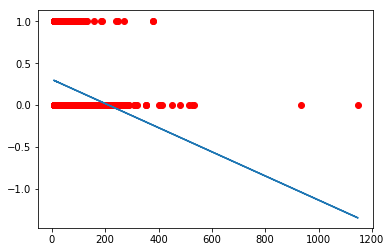

In [53]:
# plot the regression compared to the real values

%matplotlib inline
import matplotlib.pyplot as plt

predicted = model.predict(X_test)

plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, predicted)
plt.show()